# Rising Food Prices and Poverty in Latin America and the Caribbean:
## Effect of Ukrainian invasion


In [6]:
%%capture
%matplotlib inline
from scldata_simulation import * 

In [7]:
# Instantiate simulator 
scldata_simulation = SCLdataSimulation()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
# price shock components 
# - You can choose which components are affected by exogenous impact 
shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   #'Carnes, aves y huevos',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales'
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]

# shock_weight
# - pct impact of exogenous impact
shock_weight = 0.20

# population affected - shock_weight
# - specify whether the impact is focused on a subgroup of the population
# self-employed or independent workers in the agricultural sector will not be impacted by the Shock
shock_population = {'sec_agri': 0}

# income_growth 
# - Control by GDP growth
#gdp_growth = 0.024

In [9]:
scldata_simulation.get_poverty_lines(shock_component)

,index,anio_c,pais_c,cpi,cpi_2011,lp19_2011,lp31_2011,lp5_2011,ppp_2011,tc_wdi,weight
0,0,1989,ARG,0.745,71.430,1.905,3.108,5.013,3.161,0.042,0.500
1,26,1990,ARG,10.755,71.430,27.507,44.880,72.388,3.161,0.488,0.500
2,52,1991,ARG,19.789,71.430,50.613,82.580,133.193,3.161,0.954,0.500
3,78,1992,ARG,23.253,71.430,59.471,97.031,156.502,3.161,0.991,0.500
4,104,1993,ARG,24.973,71.430,63.872,104.212,168.083,3.161,0.999,0.500
...,...,...,...,...,...,...,...,...,...,...,...
853,753,2017,VEN,27896.758,238.542,19894.672,32459.729,52354.402,2.944,9.975,0.530
854,779,2018,VEN,182.651,238.542,130.259,212.527,342.786,2.944,nan,0.530
855,805,2019,VEN,36.541,238.542,26.060,42.518,68.578,2.944,nan,0.530
856,831,2020,VEN,89714262029.104,238.542,639.800,1043.885,1683.685,2.944,nan,0.530


In [10]:
# Get the growth by country
scldata_simulation.get_gdp_growth(year='2022').sort_values('gdp_change', ascending=False).head(5)

,pais_c,gdp_change
48057,GUY,0.472
47546,BRB,0.112
48448,KNA,0.100
48485,LCA,0.097
48290,PAN,0.075


In [11]:
change = scldata_simulation.simulate_shock(shock_component, shock_weight, shock_population,
                                           gdp_growth_population='', year='2022')

## Deltas by Country

In [13]:
country_group = scldata_simulation.country_results(change)

In [20]:
#country_group[['pais_c', 'poor_national_new_recovery']].sort_values('poor_national_new_recovery')

<Figure size 1200x800 with 0 Axes>

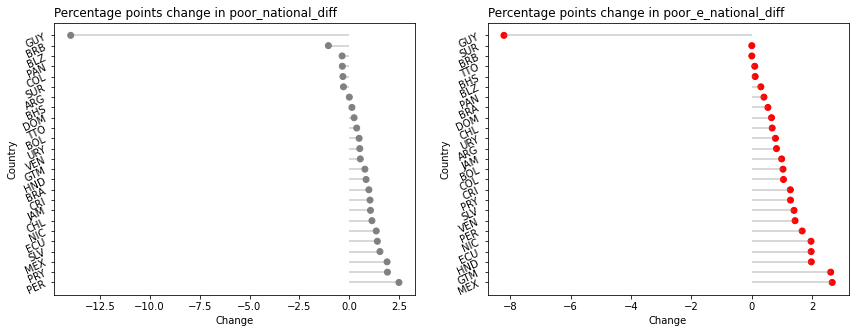

In [14]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
variables = ['poor_national', 'poor_e_national']
for variable in variables:
    country_group[variable +'_diff'] = (country_group[variable + '_delta'] - country_group[variable])*100  
variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])
country_group_melt = pd.melt(country_group[variables],id_vars=['anio_c', 'pais_c'],var_name='metrics', value_name='values')

country_group_melt['color'] = np.where(country_group_melt['metrics']=='poor_national_diff', 'grey', 'red')

# Figure by poverty level 
plt.figure(figsize = (22,5))

for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = country_group_melt[country_group_melt.metrics==variable]
    ordered_df = ordered_df.sort_values(by=['values'], ascending=False)
    # Subplot
    plt.subplot(1,3,i+1)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y = my_range, xmin=0, 
               xmax = ordered_df['values'], 
               color ='grey', alpha=0.4)
    plt.scatter(ordered_df['values'], my_range, color=ordered_df.color, alpha=1) 
    plt.yticks(my_range, ordered_df['pais_c'])
    plt.title("Percentage points change in {0}".format(variable), loc='left')
    plt.xlabel('Change')
    plt.ylabel('Country')
    plt.yticks(rotation = 25)
    
plt.show()

## Distribution of poverty rate changes in percentual points by country

Simulate impacts using a vector of scenarios to evaluate distributions.

#### Simulations for App

In [17]:
shock_weights = [i/100 for i in range(0,60,10) ]
shock_population = {'sec_agri': 0}
gdp_growth = 'IMF'



###############################
# all_no_meat
###############################
shock_component = ['Alimentos fuera del hogar',
                   'Bebidas no alcohólicas',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population,
                                                         gdp_growth_population='',gdp_growth=gdp_growth, year='2022')
simulations_concat['shock_component'] = 'all_no_meat'
simulations_concat['shock_population'] = ''.join(shock_population)
simulations_concat['gdp_growth'] = gdp_growth


### Plot distribution

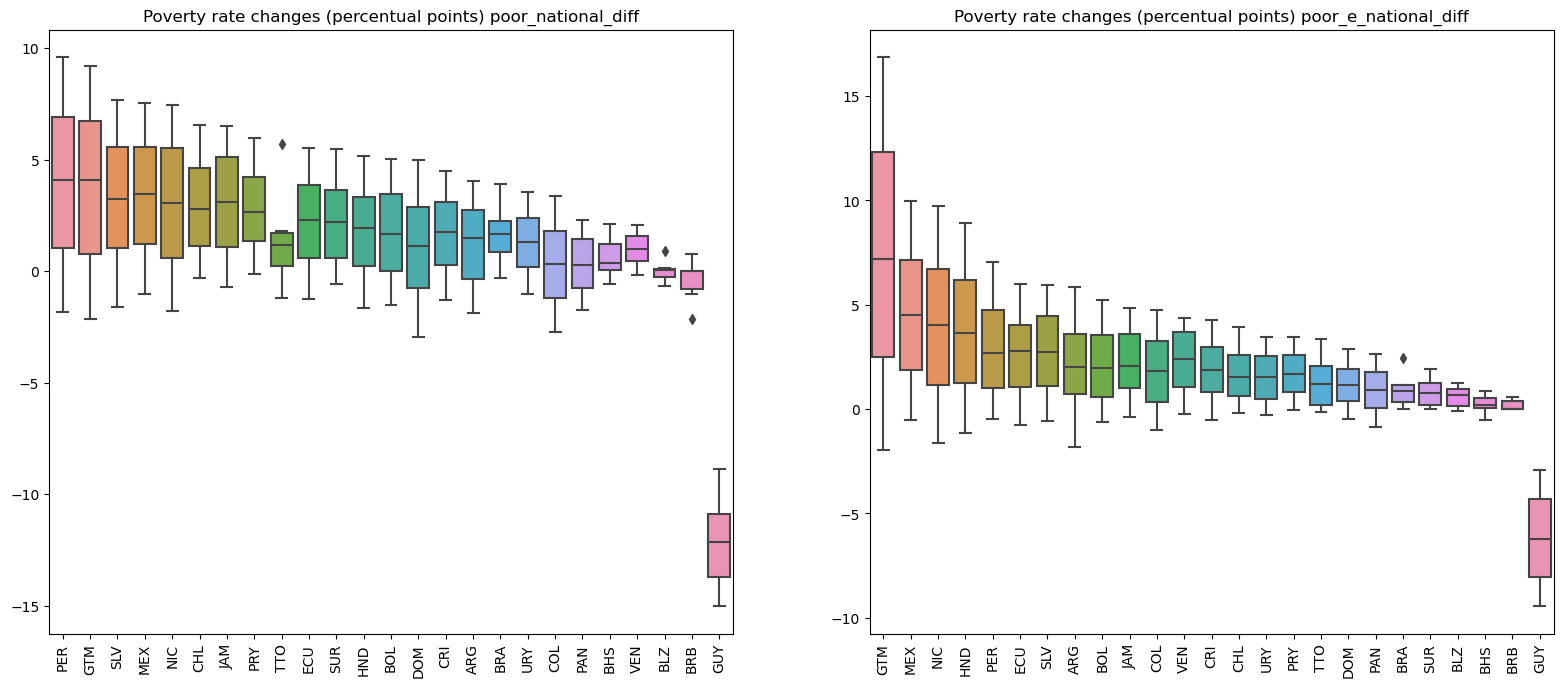

In [18]:
fig=plt.figure(figsize=(30,8), dpi= 100, facecolor='w', edgecolor='k')

variables = ['poor_national', 'poor_e_national']
for variable in variables:
    simulations_concat[variable +'_diff'] = (simulations_concat[variable + '_delta'] - simulations_concat[variable])*100  

variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])

simulations_melt = pd.melt(simulations_concat[variables],id_vars=['anio_c', 'pais_c'],
                           var_name='metrics',
                           value_name='values')
simulations_melt['color'] = np.where(simulations_melt['metrics']=='poor_national_diff', 'grey', 'red')



for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = simulations_melt[simulations_melt.metrics==variable]
    #ordered_df = ordered_df.sort_values(by=[ 'pais_c'], ascending=False)
    ordered_df = ordered_df.sort_values(by=[ 'values'], ascending=False)
    
    # Subplot
    plt.subplot(1,3,i+1)
    #plt.figure(figsize = (9,5))
    my_range=range(1, len(ordered_df.index)+1 )
    
    # Distribution in changes in PL
    ax = sns.boxplot(x = 'pais_c', y = 'values', data = ordered_df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Poverty rate changes (percentual points) ' + variable)
    ax.tick_params(axis='x', rotation=90)

plt.show()